# Introduction

Our report utilizes data from the Vancouver Police Department to study crime report trends across different neighborhoods in Vancouver. This study has the potential to assist the police in identifying areas with a higher probability of crime activities, thereby enabling them to strategically distribute and allocate their human resources to maximize effectiveness. To achieve this, we selected all years of crime data avaliable to improve the accuracy of our estimations, particularly considering the rise in crime reports during the pandemic. Maximizing the use of human resources is crucial in possibly minimizing the crime level.

The rationale behind selecting data from all years is to leverage historical data to estimate the proportions effectively. By considering multiple years of data, we gain a broader perspective on crime patterns, enabling us to identify long-term trends and potential seasonality. This approach leads to more accurate estimations as compared to relying solely on data from a single year, which might be influenced by external factors such as the pandemic.

To substantiate our observations, we have devised a hypothesis test to compare the proportion of "theft from vehicle" in all crime reports between two locations, Mount Pleasant and Strathcona, relying on their respective sample proportions and another hypothesis test comparing the proportion of "crimes against person" between Mount Pleasant and Strathcona.

The rationale behind conducting this hypothesis test is to examine whether the proportion of "theft from vehicle" in Mount Pleasant differs from that in Strathcona. Given the similarity in crime report rates between the two areas, we aim to investigate whether "theft from vehicle" is the primary reason for the high crime rate in Mount Pleasant. To achieve this, we have formulated the null hypothesis, assuming that the difference in the proportion of theft from vehicle between Mount Pleasant and Strathcona is zero. On the other hand, the alternative hypothesis posits that the proportion of theft from vehicle in Mount Pleasant is indeed greater than that in Strathcona. By statistically rejecting the null hypothesis and supporting the alternative hypothesis, we can provide mathematical evidence to support the claim that Mount Pleasant experiences a higher level of reported crime due to theft from vehicles. 

Similarly, the hypothesis test for "crime against person" aims to explore whether this specific type of crime is a significant contributing factor to the higher crime rate observed in Strathcona, as compared to Mount Pleasant. The null hypothesis posits that the proportion of "crime against person" in Strathcona is equal to that in Mount Pleasant. On the other hand, the alternative hypothesis suggests that the proportion of "crime against person" in Strathcona is greater than that in Mount Pleasant.

Based on our hypothesis testing, the variables we are mainly focusing on would be # "Theft from vehicle" and "Crimes against person" in column "TYPE", all years in cloumn "YEAR", and "Mount Pleasant" and "Strathcona" in column "NEIGHBOURHOOD". 


#### Based on this, we want to know: 

* Is the crime type of "Theft from a vehicle" greater in Mount Pleasant than Strathacona?

H<sub>0</sub>: Theft From Vehicle in Mount Pleasant = Strathacona

H<sub>1</sub>: Theft From Vehicle in Mount Pleasant > Strathacona

* Is the crime type of "Crimes against a person" greater in Strathacona than Mount Pleasant ?

H<sub>0</sub>: Offence against a person in Mount Pleasant = Strathacona

H<sub>1</sub>: Offence against a person in Mount Pleasant > Strathacona



## Preliminary Results

### Importing Libraries

Importing some necessary libraries

In [1]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Reading the Data

Reading crime dataset from github link and performing some cleaning to make the data more readable by using mutate(), as_factor() and drop_na() functions.

In [2]:
crime_data <- read_csv("https://raw.githubusercontent.com/vkyaang/Stat201-project/main/crimedata_csv_AllNeighbourhoods_AllYears.csv") %>%
    mutate(TYPE = as_factor(TYPE),
          NEIGHBOURHOOD = as_factor(NEIGHBOURHOOD)) %>%
    drop_na()
head(crime_data)

Rows: 868146 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
Theft from Vehicle,2008,12,7,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2009,8,28,19,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2012,7,25,12,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2014,5,8,12,49,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2014,10,19,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2015,2,18,18,30,11XX E HASTINGS ST,Strathcona,494141.1,5458690


*Table 1: The crime dataset*

### Data Summary 

Calculating the relevant summaries and finding the point estimates

In [3]:
# select crime_data with only chosen neighborhood and type
crime_data_clean <- crime_data %>%  
                    select(TYPE, NEIGHBOURHOOD) %>%
                    group_by(TYPE)

crime_data_total <- crime_data_clean %>%
    summarise(total = n())
    

# Separating the two neighbourhood to get a data summary
mount_pleasant_n <- crime_data_clean %>%  
    filter(NEIGHBOURHOOD == 'Mount Pleasant') %>%
    summarise(MountPleasent = n())

strathcona_n <- crime_data_clean %>%
    filter(NEIGHBOURHOOD == 'Strathcona') %>%
    summarise(Strathcona = n())

# Combining the datasets and finding proportion and other relevant data, presenrted in a form of a table
crime_data_sum <- crime_data_total %>%
    inner_join(mount_pleasant_n, by = 'TYPE') %>%
    inner_join(strathcona_n, by = 'TYPE') %>%
    mutate(MountPleasent_prop = MountPleasent/sum(total)) %>%
    mutate(strathcona_prop = Strathcona/sum(total)) %>%
    mutate(prop_diff = MountPleasent_prop - strathcona_prop)


head(crime_data_clean)


TYPE,NEIGHBOURHOOD
<fct>,<fct>
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona


*Table2 : Clean data with only relevant data*

In [4]:
crime_data_total

TYPE,total
<fct>,<int>
Theft from Vehicle,240856
Theft of Bicycle,36930
Theft of Vehicle,44710
Vehicle Collision or Pedestrian Struck (with Fatality),347
Vehicle Collision or Pedestrian Struck (with Injury),28839
Break and Enter Commercial,47310
Break and Enter Residential/Other,72174
Homicide,309
Mischief,105195


*Table 3: Sum total of all crimes*

In [5]:
crime_data_sum

TYPE,total,MountPleasent,Strathcona,MountPleasent_prop,strathcona_prop,prop_diff
<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Theft from Vehicle,240856,13345,13161,1.537457e-02,1.516258e-02,0.0002119835
Theft of Bicycle,36930,3955,1692,4.556494e-03,1.949327e-03,0.0026071669
Theft of Vehicle,44710,3118,2250,3.592199e-03,2.592190e-03,0.0010000092
Vehicle Collision or Pedestrian Struck (with Fatality),347,21,34,2.419377e-05,3.917087e-05,-0.0000149771
Vehicle Collision or Pedestrian Struck (with Injury),28839,2124,1559,2.447027e-03,1.796100e-03,0.0006509277
Break and Enter Commercial,47310,4122,3146,4.748892e-03,3.624457e-03,0.0011244343
Break and Enter Residential/Other,72174,3872,2681,4.460871e-03,3.088738e-03,0.0013721325
Homicide,309,19,32,2.188960e-05,3.686670e-05,-0.0000149771
Mischief,105195,6102,8142,7.030019e-03,9.380271e-03,-0.0023502521


*Table 4: Proportions of different crimes*

In [6]:
summary(crime_data_clean)

                                TYPE                          NEIGHBOURHOOD   
 Theft from Vehicle               :240856   Central Business District:233260  
 Other Theft                      :215709   West End                 : 78052  
 Mischief                         :105195   Strathcona               : 55744  
 Offence Against a Person         : 75613   Mount Pleasant           : 54681  
 Break and Enter Residential/Other: 72174   Fairview                 : 53340  
 Break and Enter Commercial       : 47310   Grandview-Woodland       : 48805  
 (Other)                          :111135   (Other)                  :344110  

*Table 5: Dataset Summary*

In [7]:
# Getting the number of rows of  each crime time in the two neighbourhoods

dataMP <- crime_data_clean |>
            filter(NEIGHBOURHOOD == "Mount Pleasant") |>
            group_by(TYPE) |>
            summarize(n= n())



dataS <- crime_data_clean |>
            filter(NEIGHBOURHOOD == "Strathcona") |>
            group_by(TYPE) |>
            summarize(n= n())

dataMP

TYPE,n
<fct>,<int>
Theft from Vehicle,13345
Theft of Bicycle,3955
Theft of Vehicle,3118
Vehicle Collision or Pedestrian Struck (with Fatality),21
Vehicle Collision or Pedestrian Struck (with Injury),2124
Break and Enter Commercial,4122
Break and Enter Residential/Other,3872
Homicide,19
Mischief,6102


*Table 6: Number of crimes reported in Mount Pleasant*

In [8]:
dataS

TYPE,n
<fct>,<int>
Theft from Vehicle,13161
Theft of Bicycle,1692
Theft of Vehicle,2250
Vehicle Collision or Pedestrian Struck (with Fatality),34
Vehicle Collision or Pedestrian Struck (with Injury),1559
Break and Enter Commercial,3146
Break and Enter Residential/Other,2681
Homicide,32
Mischief,8142


*Table 7: Number of crimes reported in Strathacona*

In [9]:
# Calculating the total crime reported
neighbor_total <- crime_data %>%
    select(NEIGHBOURHOOD) %>%
    summarise(n = n()) %>%
    pull()

# Finding the crime rate of Mount Pleasant
dataMP_prop <- dataMP |>
     summarize(total_number_of_crime= sum(n)) |>
     mutate(location = 'Mount Pleasant') |>
     mutate(prop = total_number_of_crime/neighbor_total) 


# Finding the crime rate of Strathcona
dataS_prop <- dataS |>
      summarize(total_number_of_crime= sum(n))  |>
      mutate(location = 'Strathcona') |>
      mutate(prop = total_number_of_crime/neighbor_total) 

    

In [10]:
# Binding the two crime rates
proportion <- rbind(dataS_prop, dataMP_prop) 

proportion

total_number_of_crime,location,prop
<int>,<chr>,<dbl>
55744,Strathcona,0.06422179
54681,Mount Pleasant,0.06299712


*Table 8: Crimes rates of two neighboorhoods*

### Visualization 

Plotting all the summarized data and comparing the crime rates 

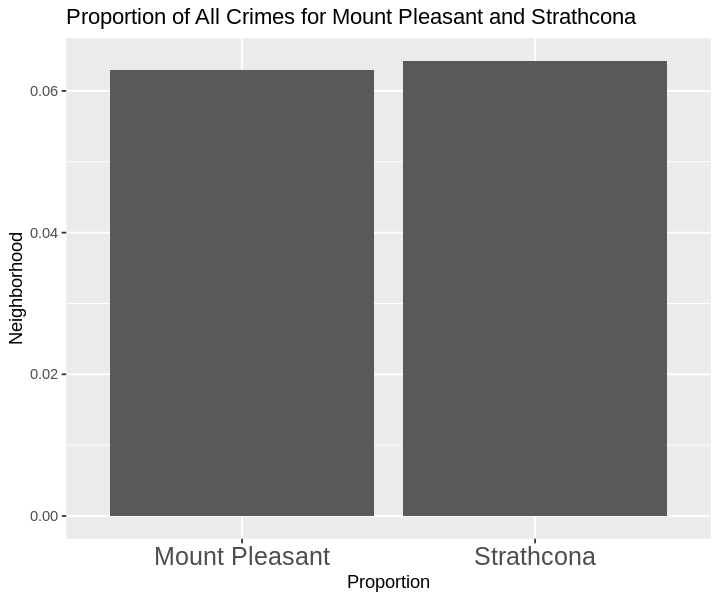

In [11]:
# Plotting the crime rates
options(repr.plot.width = 6, repr.plot.height = 5)
prop_plot <- proportion %>%
    ggplot(aes(x=location, y=prop)) +
    geom_bar(stat = 'identity') +
    labs(y='Neighborhood', x='Proportion') +
    ggtitle('Proportion of All Crimes for Mount Pleasant and Strathcona ') +
    theme(axis.text.x = element_text(size=15))

prop_plot

*Plot 1: Crime rates plot*

In [12]:
# Plotting Proportions of different types of crimes in Mount Pleasant
options(repr.plot.width = 12, repr.plot.height = 10)
mountpleasant_sum_plot <- crime_data_sum %>%
    ggplot(aes(x=TYPE, y= MountPleasent_prop, fill=TYPE)) +
    geom_bar(stat = 'identity') +
    labs(y='Proportion(Mount Pleasant)', x='Type of Crimes') +
    ggtitle('Mount Pleasant Proportion of All Crimes') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15))

# Plotting Proportions of different types of crimes in Strathacona
options(repr.plot.width = 15, repr.plot.height = 10)
strathcona_sum_plot <- crime_data_sum %>%
    ggplot(aes(x=TYPE, y=strathcona_prop, fill=TYPE)) +
    geom_bar(stat = 'identity') +
    labs(y='Proportion(Strathcona)', x='Type of Crimes') +
    ggtitle('Strathconat Proportion of All Crimes') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15))


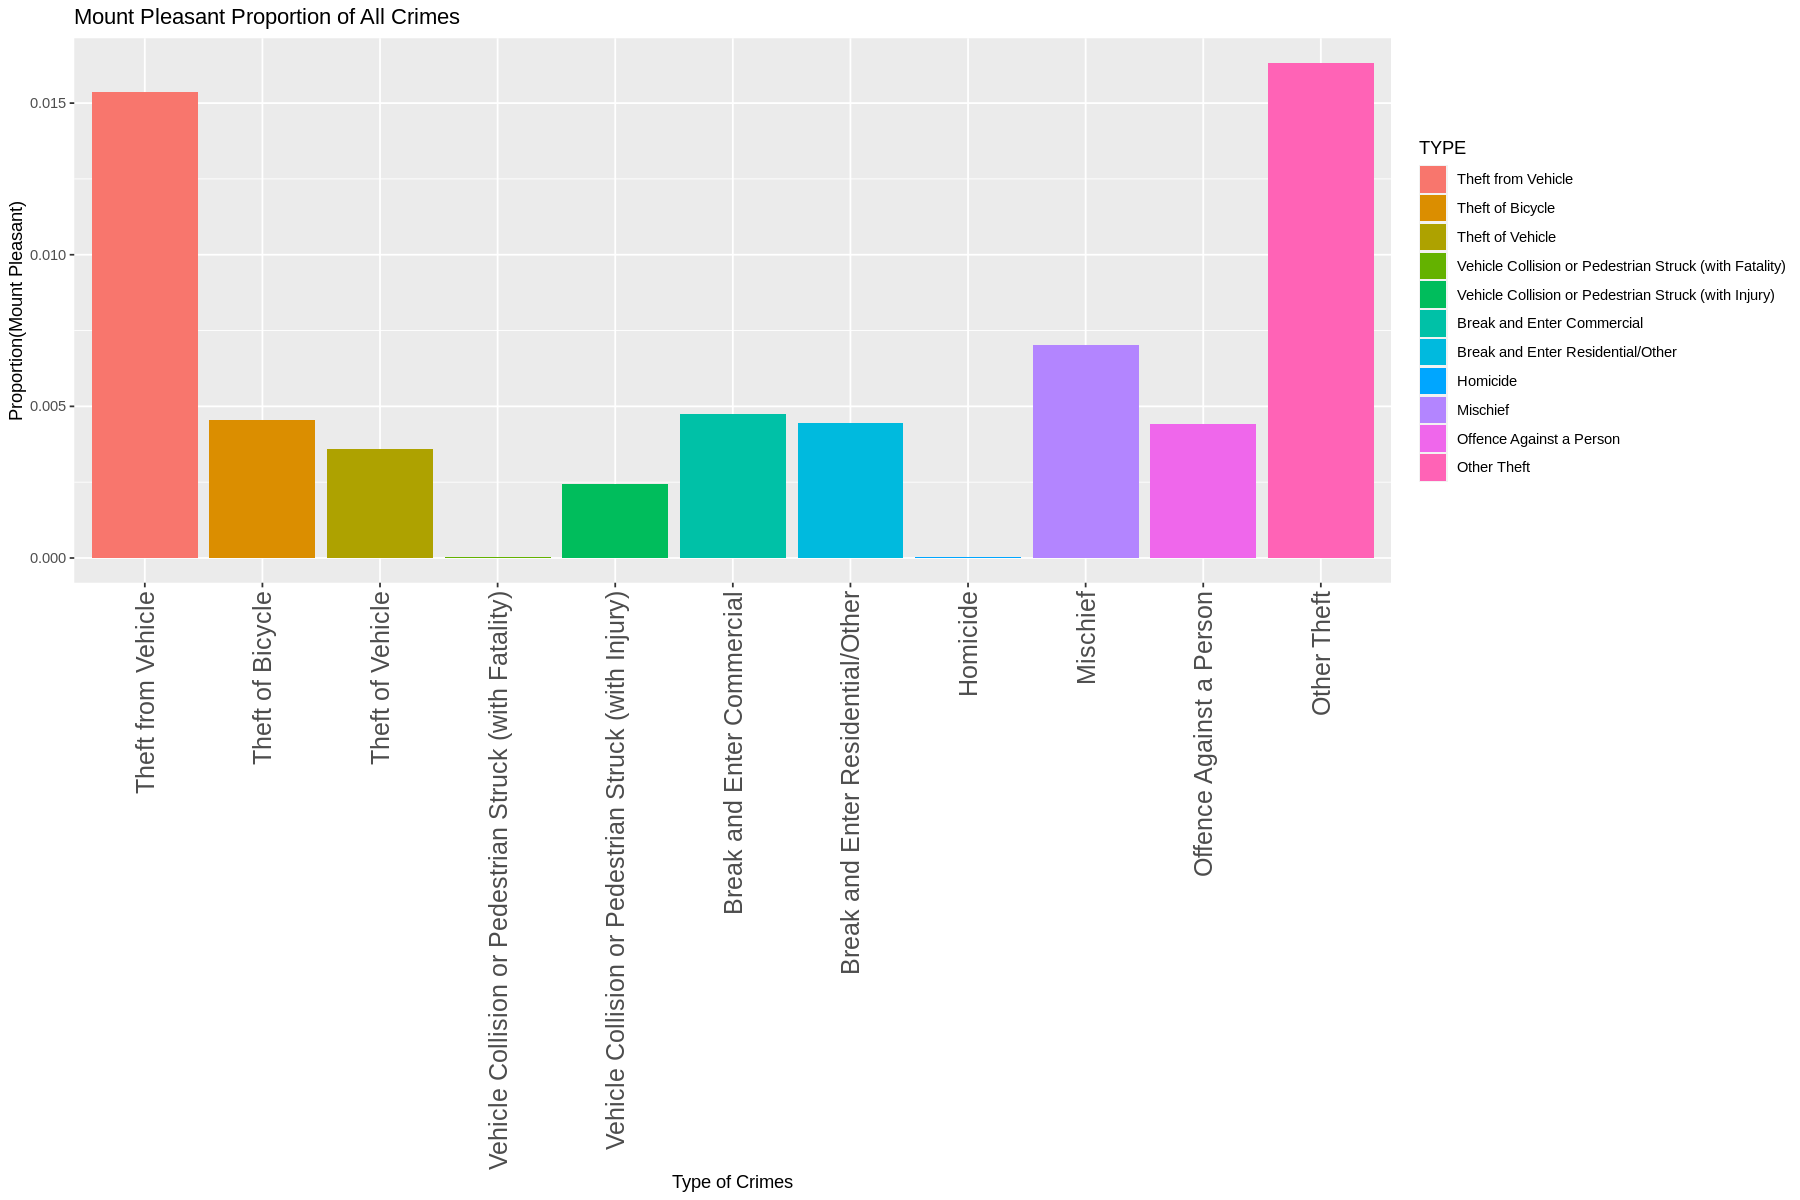

In [13]:
mountpleasant_sum_plot

*Plot 2: Different Type of crimes in Mount Pleasant*

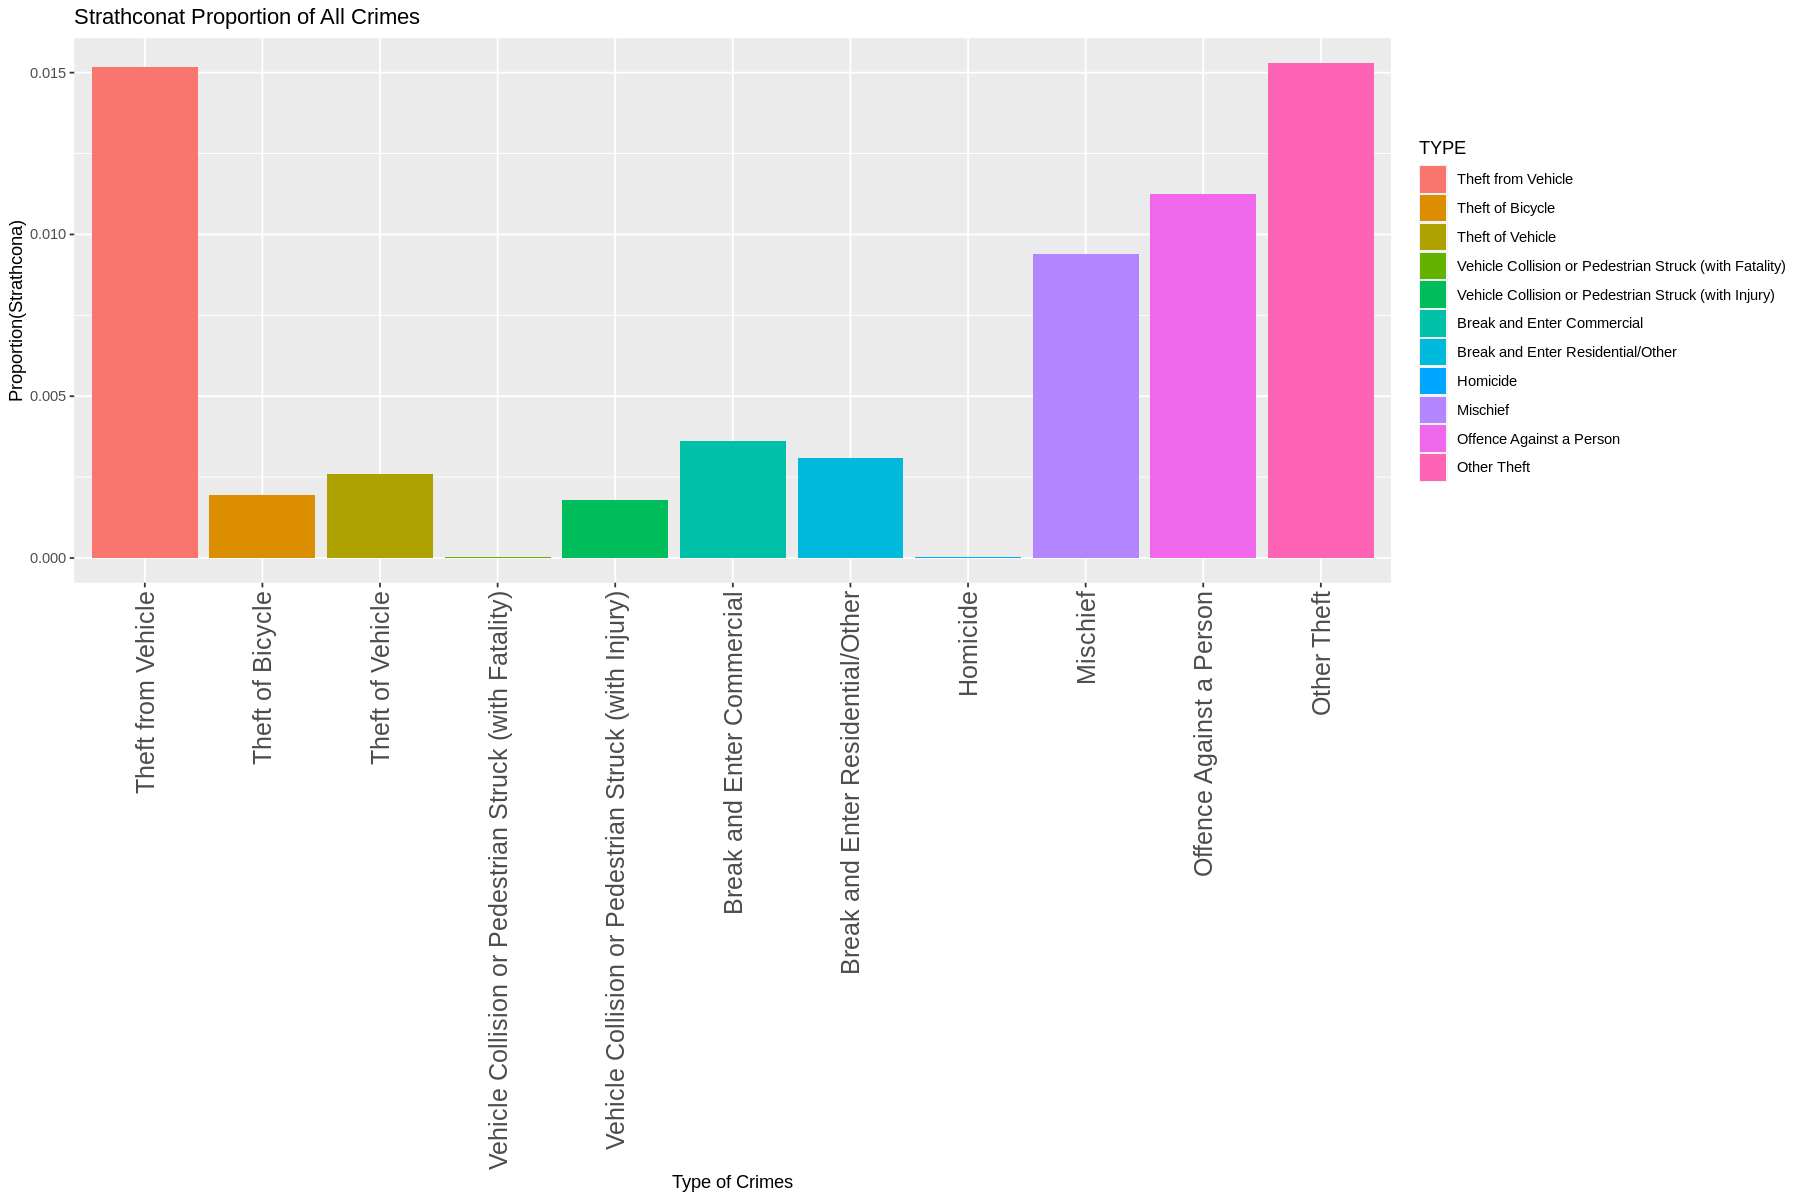

In [14]:
strathcona_sum_plot

*Plot 3: Different Type of crimes in Strathacona*

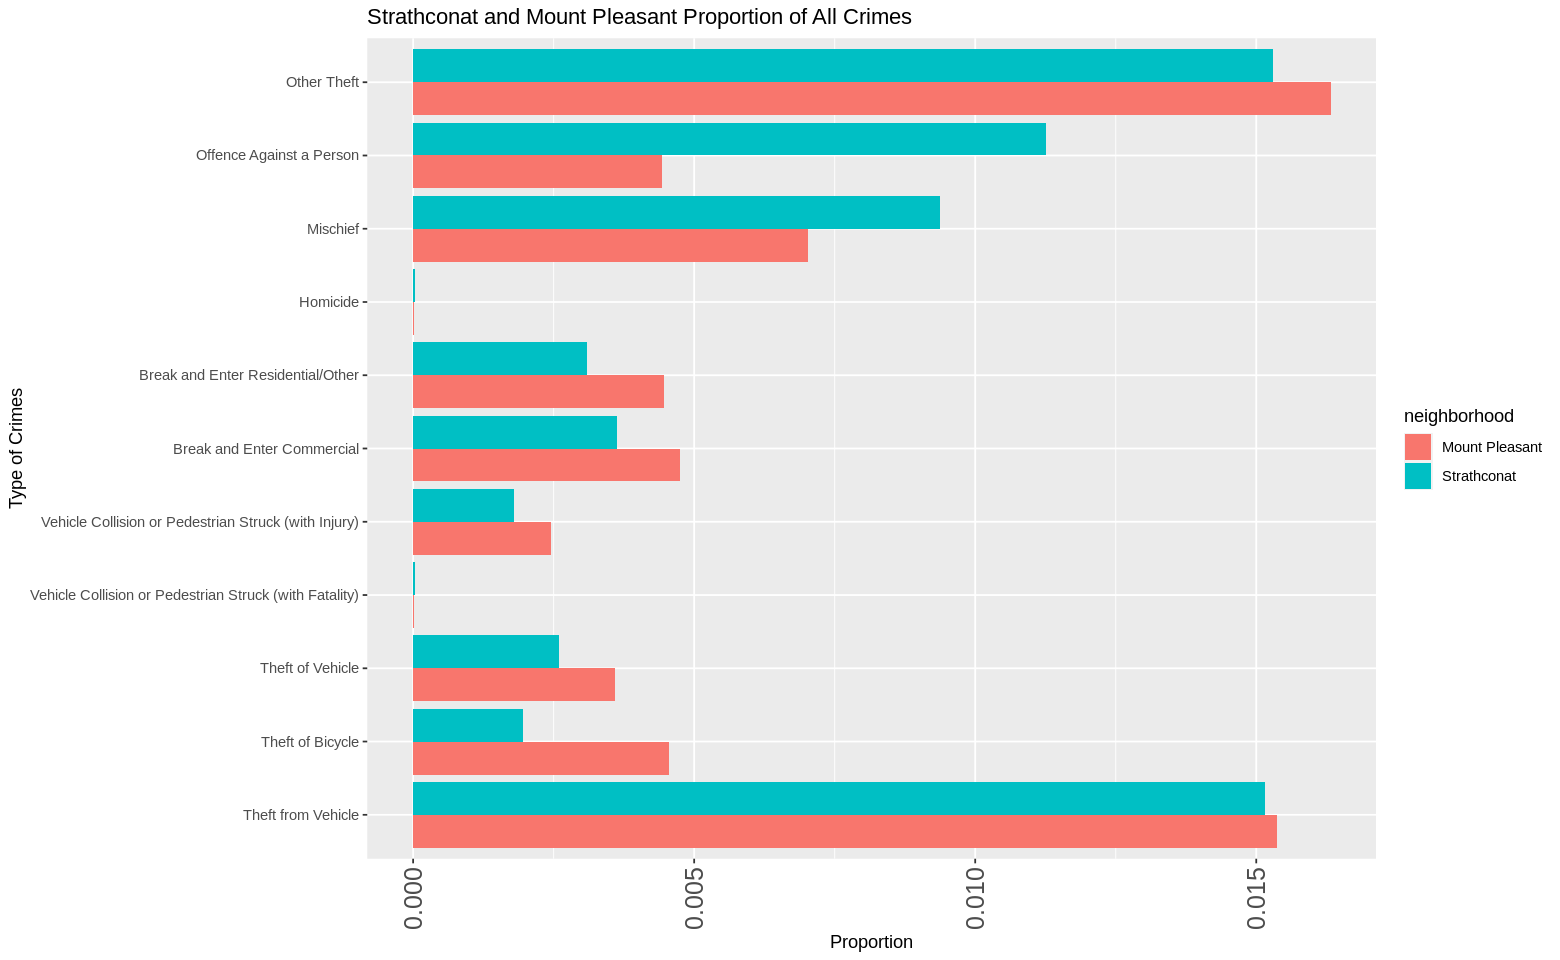

In [15]:
options(repr.plot.width = 13, repr.plot.height = 8)

mp_prop <- crime_data_sum %>%
    select(MountPleasent_prop, TYPE) %>%
    mutate(neighborhood = 'Mount Pleasant', 
          prop = MountPleasent_prop) %>%
    select(-MountPleasent_prop)

s_prop <- crime_data_sum %>%
    select(strathcona_prop, TYPE) %>%
    mutate(neighborhood = 'Strathconat', 
          prop = strathcona_prop)  %>%
    select(-strathcona_prop)

    
all_prop <- rbind(mp_prop, s_prop)

combined_prop_plot <- all_prop %>%
    ggplot(aes(x=TYPE, y=prop, fill = neighborhood)) +
    geom_bar(stat = 'identity', position = "dodge") +
    labs(y='Proportion', x='Type of Crimes', legend= 'Neighborhood') +
    ggtitle('Strathconat and Mount Pleasant Proportion of All Crimes') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15)) +
    coord_flip()

combined_prop_plot


*Plot 4: Comparing the crime rates*

## Method

### What do you expect to find?

We want to find the  difference of same crime rates between Strathconat and Mount Pleasantin

### What impact could such findings have?

Our report uses data from the Vancouver Police Department to study trends in crime across select Vancouver neighborhoods. This study might help police to check which places have a high probability of crime activities and distribute their human resources to the Vancouver neighborhoods. That is one of the impact of our study.

### What future questions could this lead to?

Finally, we're being careful to get the trend of crime of 2022. After the COVID-19, our economy became more and more stable this year, compared to other years. Since our economy is becoming stable, the crime rate would also be stable as well, we are not using floating data for our study. Thus, our data have relatively less extreme values and outliers, we could get more accurate approximations of our estimations.That is why we choose yaer 2022 as our dataset.
We get the crime rates of Strathconat and Mount Pleasantin in 2022. In 2023, the data will change and the result of our study might change as well. Our study might be helpful when predict the future crime rates in 2023 or further years.This also means that  the Vancouver Police Departmentwould rearange the distribution of their human resourcesin these two places.

### What are the strength and limitations of our study?
We are using the dataset of year 2022. The dataset we have only conclude the data in one year, which cannot represeents the overall difference of the crime rates between Strathconat and Mount Pleasantin absolutely. Thus, we uses two hypothesis test in our research, and we decided to uses the significants level = 90% for both of them to minimize the uncertainty of our research.

## References

Vancouver Police Department's Open Crime Data 
https://geodash.vpd.ca/opendata/